In [1]:
#made by Glagolev A. N 

import numpy as np
import math as m
#import gd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
n = 10
A = np.eye(n)
A = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A[i, j] =  1.0 / (i + j + 1)
#Other cool formulas: (i + j + 1), max(i, j) + 1
#A = I : единичная матрица
b = np.ones(n)
x0 = np.zeros(n)
step = 1.0 / np.trace(A.T @ A)

In [3]:
func = lambda x: (A @ x - b).T @ (A @ x - b) * 0.5
grad = lambda x: A.T @ (A @ x - b)

In [4]:
def gradient_step(x_k, grad, step):
    return x_k - step * grad(x_k)   
#grad_fast_step(grad, step)
#print(func(y_s))

In [11]:
iter = 600
res = []

def grad_fast_step(grad, step, x = x0, x_next = x0, L = 0):
    L_new = (1 + m.sqrt(1 + 4 * L * L)) * 0.5
    gamma = (1 - L) / L_new
    
    for i in range(iter):
        grad_step = gradient_step(x, grad, step)
        x = (1 - gamma) * grad_step + gamma * x_next
        x_next = grad_step

        L = L_new
        L_new = (1 + m.sqrt(1 + 4 * L * L)) * 0.5
        gamma = (1 - L) / L_new
        res.append(func(x_next))
    return x_next, res
grad_fast_step(grad, step)

(array([ 2.31537898, -5.42171175, -5.4242889 , -2.74672958,  0.24699626,
         2.88931353,  5.05064084,  6.76217651,  8.09488124,  9.12096326]),
 [1.347723061953071,
  1.347723061953071,
  1.25703538555591,
  1.1556203913839391,
  1.0439975808499238,
  0.9273632215660974,
  0.8105162747607484,
  0.6976738344954161,
  0.5923202334155414,
  0.4971076768263678,
  0.4138156592956783,
  0.3433684346708886,
  0.2859041577353848,
  0.24088542759256232,
  0.20723861112990252,
  0.18350839974097505,
  0.16801441588936844,
  0.15899813503494098,
  0.15475065975576657,
  0.1537146753558958,
  0.15455691874601918,
  0.15621041226630245,
  0.15788830170218543,
  0.15907320450942652,
  0.1594874033805658,
  0.15904996908375257,
  0.15782699150790683,
  0.15598062361934542,
  0.1537217266609291,
  0.15126969817650235,
  0.14882172568786356,
  0.14653238657582246,
  0.144503334149295,
  0.14278186370401222,
  0.14136649594417855,
  0.14021736622426076,
  0.13926915042468513,
  0.13844444831184627,


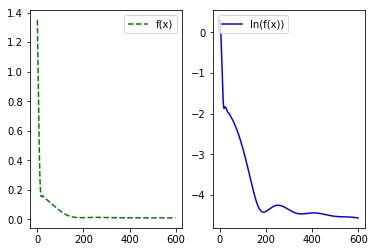

In [12]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(res,'g--', label='f(x)')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(np.log(res), 'b', label='ln(f(x))')
plt.legend(loc=2)
plt.show()

In [16]:
#A[i, j] = Символ Кронекера от i, j